<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Machine_Learning_with_Tree_Based_Models_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning with Tree-Based Models in Python

course from DataCamp
modified notes and solved exercises by me

Decision trees are supervised learning models used for problems involving classification and regression.

>  Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. 


By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise.

>  Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions

Covered in this notebook:
* how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library
* understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings
*  understand how to tune the most influential hyperparameters in order to get the most out of your models.


##Classification and Regression Trees
*Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression.*
###Decision tree for classification
**Classification-tree**
Given a labeled dataset, a classification tree learns a sequence of if-else questions about individual features in order to infer the labels.

> In contrast to linear models, trees are able to capture non-linear relationships between features and labels. 

 In addition, trees don't require the features to be on the same scale through standardization for example.

 To understand trees more concretely, we'll try to predict whether a tumor is malignant or benign in the Wisconsin Breast Cancer dataset using only 2 features.

 * The figure here shows a scatterplot of two cancerous cell features with malignant-tumors in blue and benign-tumors in red.


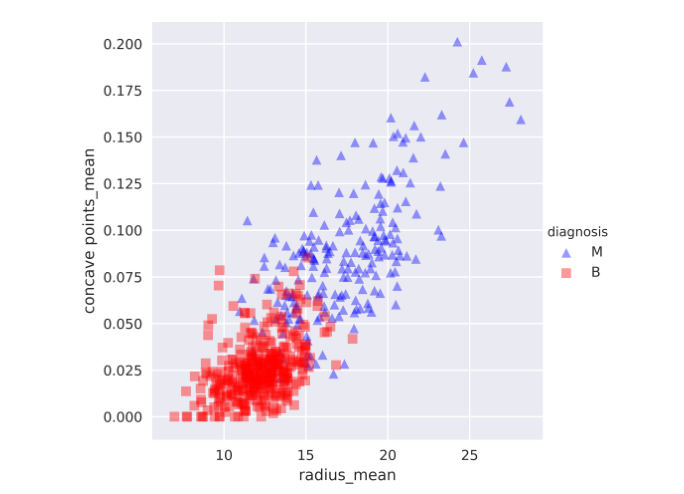

**Decision-tree Diagram**

When a classification tree is trained on this dataset, the tree learns a sequence of if-else questions with each question involving one feature and one split-point.

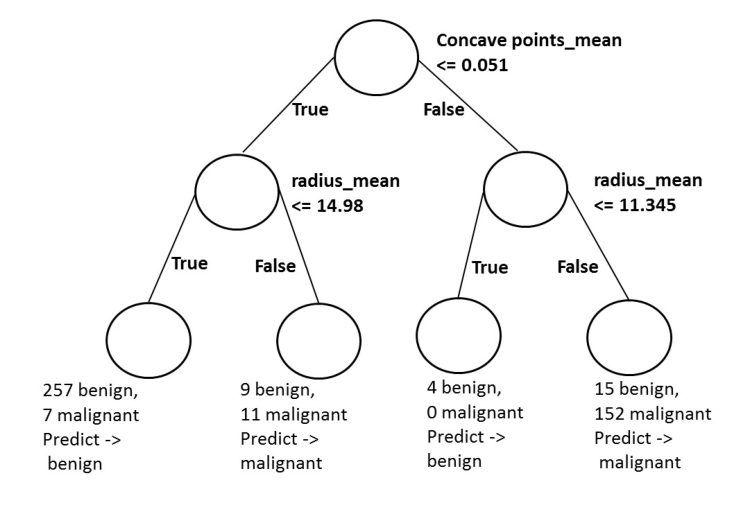

> At the top, the tree asks whether the concave-points mean of an instance is <= 0-point-051.
* If it is, the instance traverses the True branch;
* otherwise, it traverses the False branch. 

Similarly, the instance keeps traversing the internal branches until it reaches an end. The label of the instance is then predicted to be that of the prevailing class at that end. 

> The maximum number of branches separating the top from an extreme-end is known as the maximum depth which is equal to 2 here.

**Classification-tree in scikit-learn**

* import DecisionTreeClassifier from sklearn.tree as shown in line 1. Also, import the functions train_test_split() from sklearn.model_selection and accuracy_score() from sklearn.metrics

```
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
```

* In order to obtain an unbiased estimate of a model's performance, you must evaluate it on an unseen test set. To do so, first split the data into 80% train and 20% test using train_test_split(). Set the parameter stratify to y in order for the train and test sets to have the same proportion of class labels as the unsplit dataset.

```
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=1)
```

* use DecisionTreeClassifier() to instantiate a tree classifier, dt with a maximum depth of 2 by setting the parameter max_depth to 2. Note that the parameter random_state is set to 1 for reproducibility.

```
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
```

*  call the fit method on dt and pass X_train and y_train. To predict the labels of the test-set, call the predict method on dt. Finally print the accuracy of the test set using accuracy_score(). 

```
 Fit dt to the training set
dt.fit(X_train,y_train)
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)
0.90350877192982459
```

**Decision Regions**
A classification-model divides the feature-space into regions where all instances in one region are assigned to only one class-label. These regions are known as decision-regions.

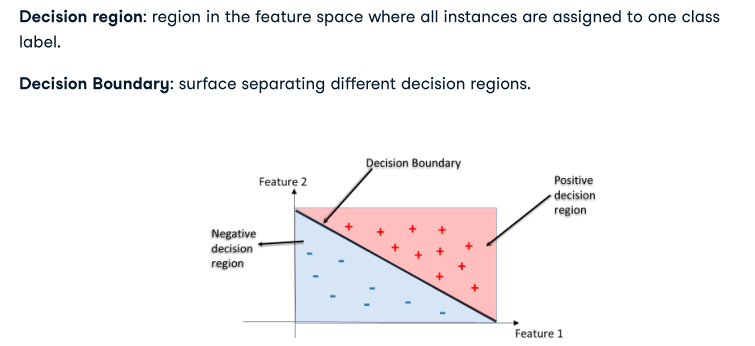


> Decision-regions are separated by surfaces called decision-boundaries. The figure here shows the decision-regions of a linear-classifier. Note how the boundary is a straight-line.

**Decision Regions: CART vs. Linear Model**

In contrast, as shown here on the right, a classification-tree produces rectangular decision-regions in the feature-space. This happens because at each split made by the tree, only one feature is involved.

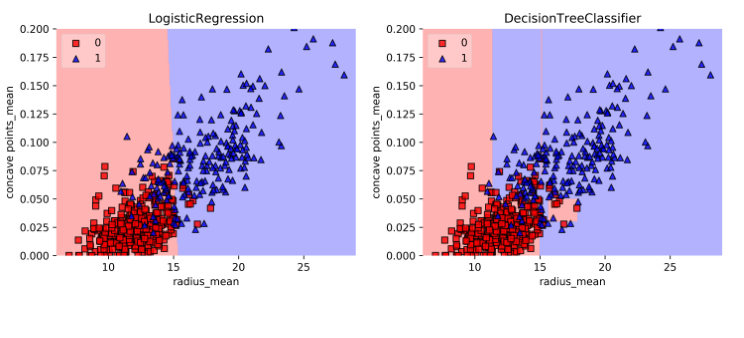

**Train your first classification tree**

You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

* Import DecisionTreeClassifier from sklearn.tree.

* Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.

* Fit dt to the training set.

* Predict the test set labels and assign the result to y_pred.


```
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])
```

```
[0 0 0 1 0]
```

> You can see the first five predictions made by the fitted tree on the test set in the console.

**Evaluate the classification tree**

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

* Import the function accuracy_score from sklearn.metrics.

* Predict the test set labels and assign the obtained array to y_pred.

* Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

```
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
```

```
Test set accuracy: 0.89
```

> Using only two features, your tree was able to achieve an accuracy of 89%!

**Logistic regression vs classification tree**

A classification tree divides the feature space into rectangular regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers.

```
plot_labeled_decision_regions(X, y, models)
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
```

* Import LogisticRegression from sklearn.linear_model.

* Instantiate a LogisticRegression model and assign it to logreg.

* Fit logreg to the training set.

* Review the plot generated by plot_labeled_decision_regions().

```
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)
```

```
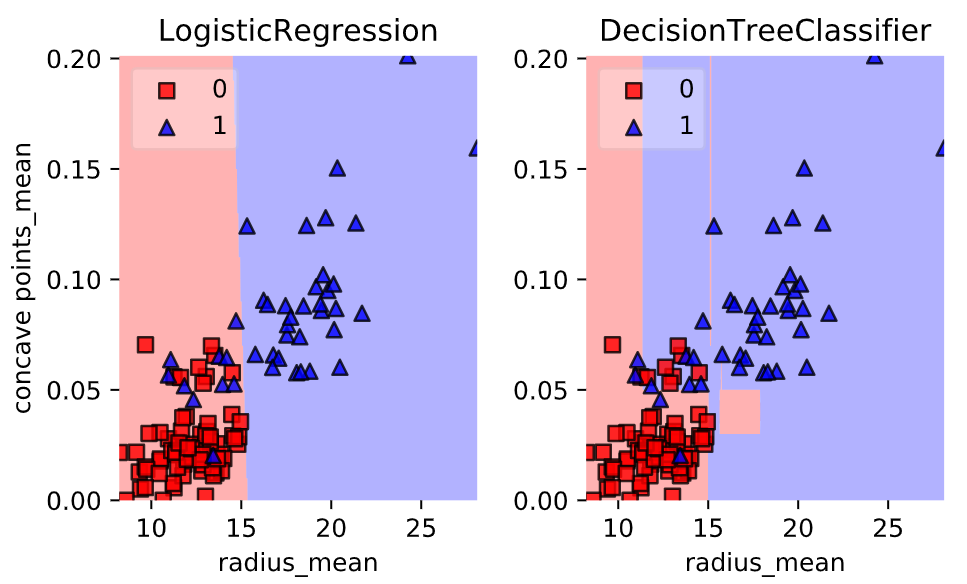

> Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

###Classification tree Learning

**Building Blocks of a Decision-Tree**

A decision-tree is a data-structure consisting of a hierarchy of individual units called nodes. **A node is a point that involves either a question or a prediction.**

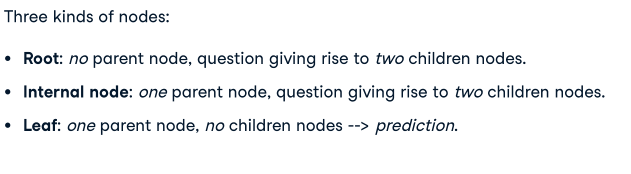

* The root is the node at which the decision-tree starts growing. It has no parent node and involves a question that gives rise to 2 children nodes through two branches. 
* An internal node is a node that has a parent. It also involves a question that gives rise to 2 children nodes. 
*  a node that has no children is called a leaf. A leaf has one parent node and involves no questions. It's where a prediction is made. 

>  Recall that when a classification tree is trained on a labeled dataset, the tree learns patterns from the features in such a way to produce the purest leafs. 

*the tree is trained in such a way so that, in each leaf, one class-label is predominant.*

In the tree diagram shown here, consider the case where an instance traverses the tree to reach the leaf on the left. 

>  In this leaf, there are 257 instances classified as benign and 7 instances classified as malignant.

As a result, the tree's prediction for this instance would be: 'benign'. In order to understand how a classification tree produces the purest leafs possible, let's first define the concept of information gain.

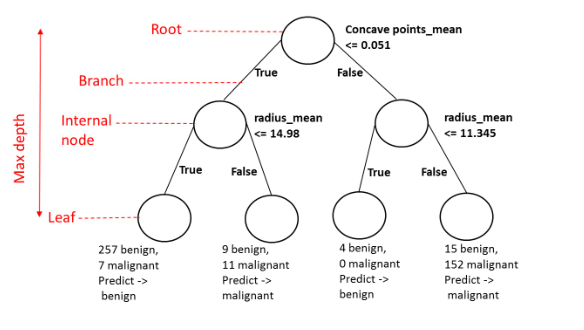

**Information Gain (IG)**

The nodes of a classification tree are grown recursively; in other words, **the obtention of an internal node or a leaf depends on the state of its predecessors.**

To produce the purest leafs possible, at each node, a tree asks a question involving one feature f and a split-point sp. 
> But how does it know which feature and which split-point to pick?

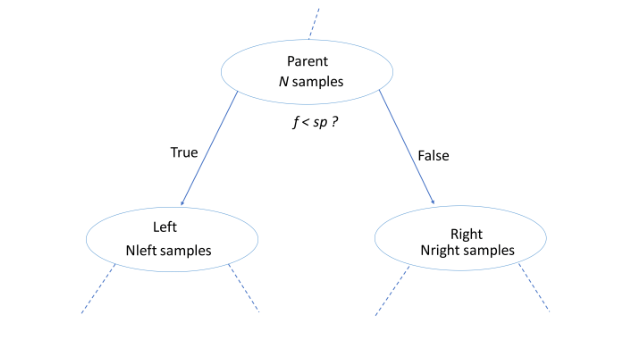

The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. Consider the case where a node with N samples is split into a left-node with Nleft samples and a right-node with Nright samples.

The information gain for such split is given by the formula:

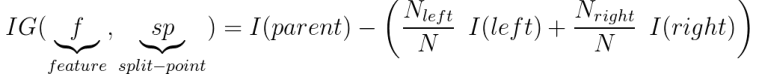

*'What criterion is used to measure the impurity of a node?'*

> there are different criteria you can use among which are the gini-index and entropy

**Classification-Tree Learning**

When an unconstrained tree is trained, the nodes are grown recursively. In other words, a node exists based on the state of its predecessors. 

>  At a *non-leaf node*, the data is split based on feature f and split-point sp in such a way to maximize information gain.

 If the information gain obtained by splitting a node is null, the node is declared a leaf.

 Keep in mind that these rules are for unconstrained trees. If you constrain the maximum depth of a tree to 2 for example, all nodes having a depth of 2 will be declared leafs even if the information gain obtained by splitting such nodes is not null.

 **Information Criterion in scikit-learn**

 * you can set the information criterion of dt to the gini-index by setting the criterion parameter to 'gini' as shown on the last line here.

 ```
 # Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=1)
# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
```

* Now fit dt to the training set and predict the test set labels. Then determine dt's test set accuracy which evaluates to about 92%.

```
# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict test-set labels
y_pred= dt.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)
0.92105263157894735
```

**Using entropy as a criterion**

train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

* Import DecisionTreeClassifier from sklearn.tree.

* Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.

* Set the information criterion to 'entropy'.

* Fit dt_entropy on the training set.

```
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
```

**Entropy vs Gini index**

compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

* Import accuracy_score from sklearn.metrics.
* Predict the test set labels of dt_entropy and assign the result to y_pred.
* Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
* Review accuracy_entropy and accuracy_gini.

```
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)
```

```
    Accuracy achieved by using entropy:  0.929824561404
    Accuracy achieved by using the gini index:  0.929824561404
```

> Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

###Decision tree for regression

in regression, the target variable is continuous, so the output of the model is a real number. 

Decision tree for regression on a dataset example

Dataset consists of 6 features corresponding to the characteristics of a car and a continuous target variable labeled mpg which stands for miles-per-gallon. Our task is to predict the mpg consumption of a car given these six features. To simplify the problem, here the analysis is restricted to only one feature corresponding to the displacement of a car. This feature is denoted by displ.

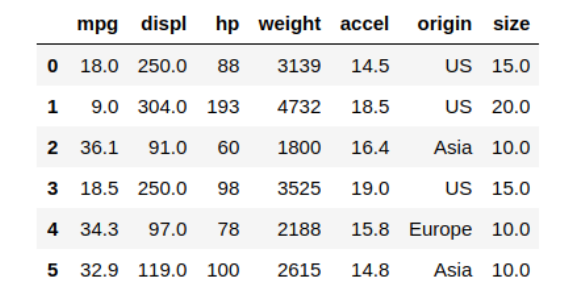

A 2D scatter plot of mpg versus displ shows that the mpg-consumption decreases nonlinearly with displacement. 
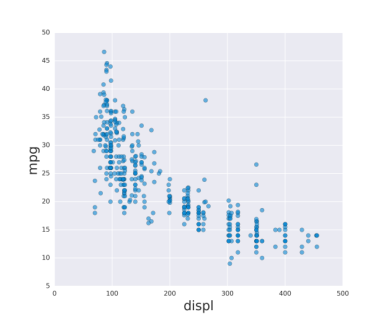


> Note that linear models such as linear regression would not be able to capture such a non-linear trend.

**Regression-Tree in scikit-learn**

* import DecisionTreeRegressor from sklearn-dot-tree and the functions train_test_split() from sklearn-dot-model_selection and mean_squared_error as MSE() from sklearn-dot-metrics. Then, split the data into 80%-train and 20%-test using train_test_split. 

```
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
random_state=3)
```

*  instantiate the DecisionTreeRegressor() with a maximum depth of 4 by setting the parameter max_depth to 4. In addition, set the parameter min_sample_leaf to 0-dot-1 to impose a stopping condition in which each leaf has to contain at least 10% of the training data.

```
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
min_samples_leaf=0.1,
random_state=3)
```

* fit dt to the training set and predict the test set labels. To obtain the root-mean-squared-error of your model on the test-set;
  * evaluate the mean-squared error, 
  * then, raise the obtained value to the power 1/2
  * print dt's test set rmse to obtain a value of 5-dot-1.

```
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)
# Predict test-set labels
y_pred = dt.predict(X_test)
# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)
# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print(rmse_dt)
5.1023068889
```


> it's important to note that, when a regression tree is trained on a dataset, the **impurity of a node is measured using the mean-squared error of the targets** in that node. 

The regression tree tries to find the splits that produce leafs where in each leaf the target values are on average, the closest possible to the mean-value of the labels in that particular leaf.

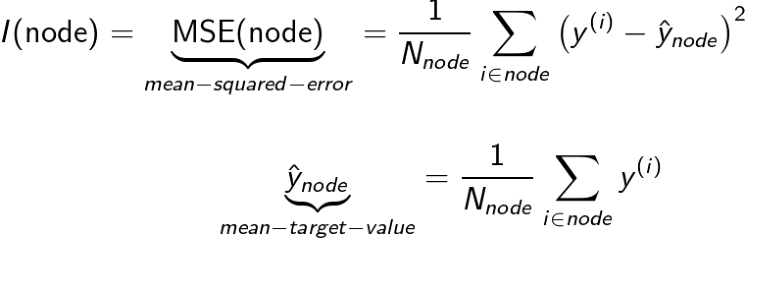

As a new instance traverses the tree and reaches a certain leaf, its target-variable 'y' is computed as the average of the target-variables contained in that leaf as shown in this formula.

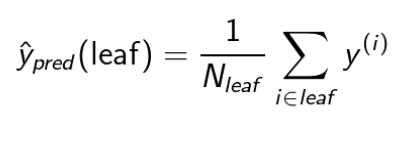

**Linear Regression vs. Regression-Tree**

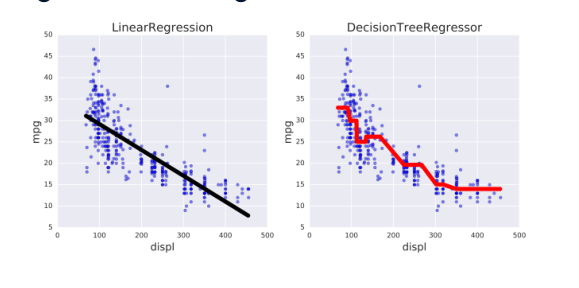

The difference between those is the best described in a picture. Look how flexible regression tree is compared to the Linear Regression.

* The linear model fails to capture the non-linear trend exhibited by the data. 
* The regression tree shows a greater flexibility and is able to capture the non-linearity, though not fully. 

**Train your first regression tree**

Train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

* Import DecisionTreeRegressor from sklearn.tree.
* Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.
* Fit dt to the training set.

```
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf= 0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)
```

**Evaluate the regression tree**

Evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

* Import the function mean_squared_error as MSE from sklearn.metrics.
* Predict the test set labels and assign the output to y_pred.
* Compute the test set MSE by calling MSE and assign the result to mse_dt.
* Compute the test set RMSE and assign it to rmse_dt.

```
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt =  mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
```

```
    Test set RMSE of dt: 4.37
```

**Linear regression vs regression tree**

Compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

* Predict test set labels using the linear regression model (lr) and assign the result to y_pred_lr.

* Compute the test set MSE and assign the result to mse_lr.

* Compute the test set RMSE and assign the result to rmse_lr.

```
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))
```

```
    Linear Regression test set RMSE: 5.10
    Regression Tree test set RMSE: 4.37
```

##The Bias-Variance Tradeoff

###Generalization Error

**Supervised Learning - Under the Hood**

In supervised learning, you make the assumption that there's a mapping f between features and labels. You can express this as y=f(x). f which is shown in red here is an unknown function that you want to determine. In reality, data generation is always accompanied with randomness or noise like the blue points shown here.

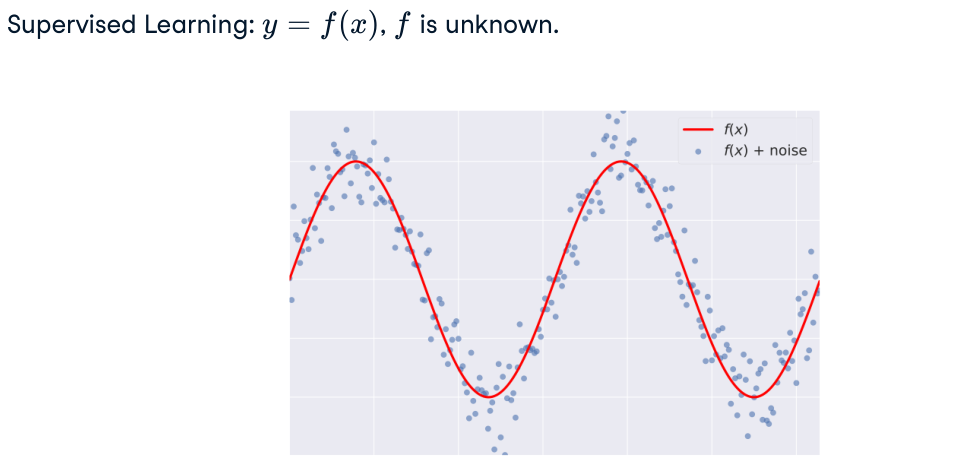

> Your goal is to find a model that best approximates f.

 When training fhat, you want to make sure that noise is discarded as much as possible. At the end, fhat should achieve a low predictive error on unseen datasets.

 **You may encounter two difficulties when approximating f.**:
 * overfitting, it's when fhat fits the noise in the training set. 
 * underfitting, it's when fhat is not flexible enough to approximate f.

*When a model overfits the training set, its predictive power on unseen datasets is pretty low.*
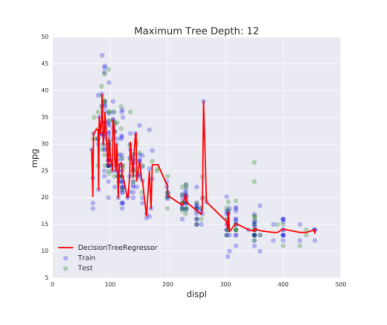
This is illustrated by the predictions of the decision tree regressor shown here in red. The model clearly memorized the noise present in the training set. Such model achieves a low training set error and a high test set error.


*When a model underfits the data, the training set error is roughly equal to the test set error. However, both errors are relatively high.*
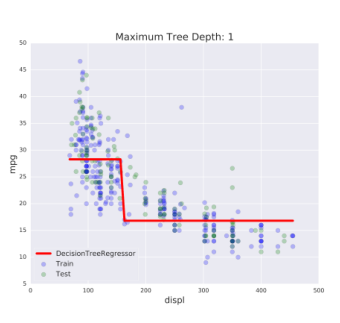

The trained model isn't flexible enough to capture the complex dependency between features and labels. In analogy, it's like teaching calculus to a 3-year old. **The child does not have the required mental abstraction level that enables him to understand calculus**.

**Generalization Error**

The generalization error of a model tells you how much it generalizes on unseen data.

 It can be decomposed into 3 terms: 
 * *bias*-  tells, on average, how much fhat and f are different. High bias models lead to underfitting.
 * *variance* - tells, how much fhat is inconsistent over different training sets. High variance models lead to overfitting.
 * and *irreducible error* where the irreducible error is the error contribution of noise. 

 To illustrate this consider the high bias model shown here in black; this model is not flexible enough to approximate the true function f shown in red. 


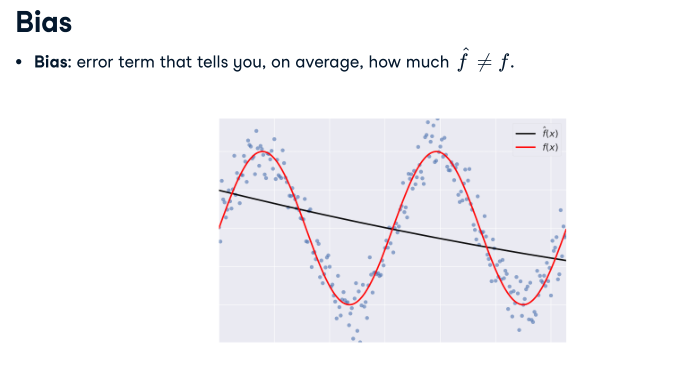


Consider the high variance model shown here in black; in this case, fhat follows the training data points so closely that it misses the true function f shown in red. 
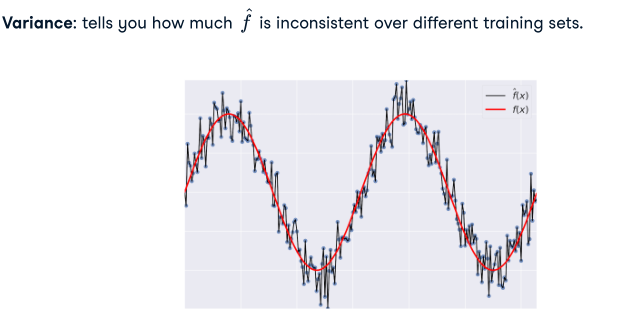


The complexity of a model sets its flexibility to approximate the true function f. 

**Bias-Variance Tradeoff**

The diagram here shows how the best model complexity corresponds to the lowest generalization error. When the model complexity increases, the variance increases while the bias decreases.

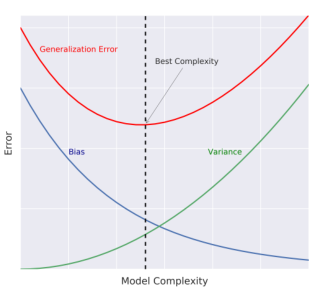

Conversely, when model complexity decreases, variance decreases and bias increases. **Your goal is to find the model complexity that achieves the lowest generalization error.**

Since this error is the sum of three terms with the irreducible error being constant, you need to find a balance between bias and variance because as one increases the other decreases. **This is known as the bias-variance trade-off**.

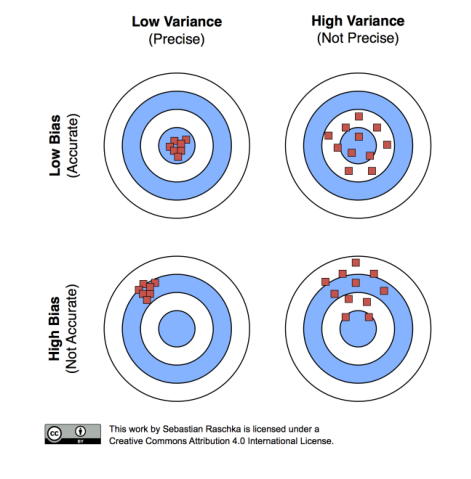

> Visually, you can imagine approximating fhat as aiming at the center of a shooting-target where the center is the true function f.

* If fhat is low bias and low variance, your shots will be closely clustered around the center. 
* If fhat is high variance and high bias, not only will your shots miss the target but they would also be spread all around the shooting target.

###Diagnose bias and variance problems

**Estimating the Generalization Error**

Split the data into a training and test set. The model fhat can then be fit to the training set and its error can be evaluated on the test set. The generalization error of fhat is roughly approximated by fhat's error on the test set.

* split the data to training and test sets,
* fit fhat to the training set,
* evaluate the error of fhat on the unseen test set.
* generalization error of fhat ≈ test set error of .

You cannot estimated Generalization Error directly because of unpredictability of the noise and unknown value of f. 

**Better Model Evaluation with Cross-Validation**

Usually, **the test set** should be kept untouched until one is confident about fhat's performance. It **should only be used to evaluate fhat's final performance or error**.

> Now, evaluating fhat's performance on the training set may produce an optimistic estimation of the error because fhat was already exposed to the training set when it was fit. 

. To obtain a reliable estimate of fhat's performance, you should use a technique called cross-validation or CV. CV can be performed using **K-Fold-CV** or hold-out-CV . 

K-Fold CV

* First, the training set (T) is split randomly into 10 partitions or folds, 
* The error of fhat is evaluated 10 times on the 10 folds, 
* Each time, one fold is picked for evaluation after training fhat on the other 9 folds. 
* At the end, you'll obtain a list of 10 errors.

* Finally the CV-error is computed as the mean of the 10 obtained errors.

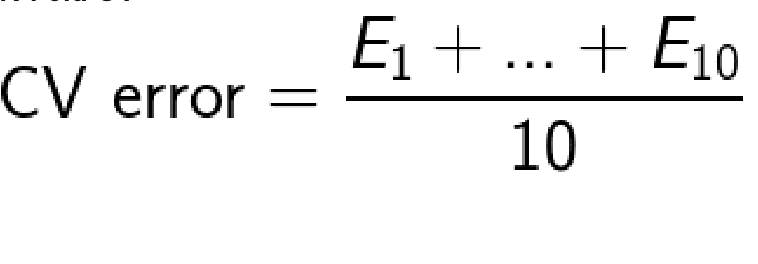







**Diagnose Variance/Bias Problems**

Once you have computed fhat's cross-validation-error, you can check if it is greater than fhat's training set error.
* **If it is greater**, fhat is said to suffer from **high variance**. In such case, fhat has overfit the training set. **To remedy this try decreasing fhat's complexity**.

> For example, in a decision tree you can reduce the maximum-tree-depth or increase the maximum-samples-per-leaf. In addition, you may also gather more data to train fhat.

* if its cross-validation-error is **roughly equal to the training error but much greater than the desired error**,  fhat is said to suffer from **high bias**. In such case fhat underfits the training set. **To remedy this try increasing the model's complexity or gather more relevant features for the problem.**

**K-Fold CV in sklearn**

In addition to the usual imports, you should also import the function cross_val_score() from sklearn-dot-model_selection. 

* split the dataset into 70%-train and 30%-test using train_test_split().

```
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
# Set seed for reproducibility
SEED = 123
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3,
random_state=SEED)
```

*  Then, instantiate a DecisionTreeRegressor() dt with the parameters max_depth set to 4 and min_samples_leaf to 0-dot-14.
```
# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4,
min_samples_leaf=0.14,
random_state=SEED)
```

* call cross_val_score() by passing dt, X_train, y_train; set the parameters cv to 10 for 10-fold-cross-validation and scoring to neg_mean_squared_error to compute the negative-mean-squared-errors. 

> The scoring parameter was set so because cross_val_score() does not allow computing the mean-squared-errors directly. 

 set n_jobs to -1 to exploit all available CPUs in computation.

```
# Evaluate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10,
scoring='neg_mean_squared_error',
n_jobs = -1)
```

> The result is a numpy-array of the 10 negative mean-squared-errors achieved on the 10-folds.

* *You can multiply the result by minus-one to obtain an array of CV-MSE*. After that, fit dt to the training set and evaluate the labels of the training and test sets.

```
# Fit 'dt' to the training set
dt.fit(X_train, y_train)
# Predict the labels of training set
y_predict_train = dt.predict(X_train)
# Predict the labels of test set
y_predict_test = dt.predict(X_test)
```

> The CV-mean-squared-error can be determined as the mean of MSE_CV.

* use the function MSE to evaluate the train and test set mean-squared-errors. Given that the training set error is smaller than the CV-error, we can deduce that dt overfits the training set and that it suffers from high variance. 

```
# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))
CV MSE: 20.51
# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))
Train MSE: 15.30
# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))
Test MSE: 20.92
```



> Notice how the CV and test set errors are roughly equal.

**Instantiate the model**

Diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

The data is already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

* Import train_test_split from sklearn.model_selection.
* Split the data into 70% train and 30% test.
* Instantiate a DecisionTreeRegressor with max depth 4 and min_samples_leaf set to 0.26.

```
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3,
random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(min_samples_leaf=0.26, max_depth=4, random_state=SEED)
```

**Evaluate the 10-fold CV error**

Evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including X_train and y_train are available in your workspace. We also imported cross_val_score from sklearn.model_selection.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

* Compute dt's 10-fold cross-validated MSE by setting the scoring argument to 'neg_mean_squared_error'.

* Compute RMSE from the obtained MSE scores.

```
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv= 10,
scoring='neg_mean_squared_error',
n_jobs = -1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))
```

```
CV RMSE: 5.14
```

> A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

**Evaluate the training error**

Evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to dt, X_train and y_train are available in your workspace.

Note that in scikit-learn, the MSE of a model can be computed as follows:

```
MSE_model = mean_squared_error(y_true, y_predicted)
```

where we use the function mean_squared_error from the metrics module and pass it the true labels y_true as a first argument, and the predicted labels from the model y_predicted as a second argument.

* Import mean_squared_error as MSE from sklearn.metrics.
* Fit dt to the training set.
* Predict dt's training set labels and assign the result to y_pred_train.
* Evaluate dt's training set RMSE and assign it to RMSE_train

```
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (mean_squared_error(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))
```

```
Train RMSE: 5.15
```

> Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.

###Ensemble Learning






##Bagging and Random Forests

##Boosting

##Model Tuning